In [1]:
from CircleParticleSim import *
import numpy as np
import numpy.random as rand

In [15]:
rand.seed(42)
for i in range(10):
    CircleParticleSim(11, steps=10000, seed=rand.randint(0,2**31-1),
                 cooling_schedule = paper_cooling_schedule,
                 step_size_schedule = random_step_size_schedule
                 )

The average particles inside the circle:

Completed simulation for 2 particles (averaged over 10 runs).
Completed simulation for 3 particles (averaged over 10 runs).
Completed simulation for 4 particles (averaged over 10 runs).
Completed simulation for 5 particles (averaged over 10 runs).
Completed simulation for 6 particles (averaged over 10 runs).
Completed simulation for 7 particles (averaged over 10 runs).
Completed simulation for 8 particles (averaged over 10 runs).
Completed simulation for 9 particles (averaged over 10 runs).
Completed simulation for 10 particles (averaged over 10 runs).
Completed simulation for 11 particles (averaged over 10 runs).
Completed simulation for 12 particles (averaged over 10 runs).


/Users/maartenstork/Documents/GitHub/Stoc3/Stochastic_Simulation_Assignment_3/CircleParticleSim.py:358: RuntimeWarning: overflow encountered in exp
  acceptance = min(1, np.exp(-dE / self.T))


Completed simulation for 13 particles (averaged over 10 runs).
Completed simulation for 14 particles (averaged over 10 runs).
Completed simulation for 15 particles (averaged over 10 runs).
Completed simulation for 16 particles (averaged over 10 runs).
Completed simulation for 17 particles (averaged over 10 runs).
Completed simulation for 18 particles (averaged over 10 runs).
Completed simulation for 19 particles (averaged over 10 runs).
Completed simulation for 20 particles (averaged over 10 runs).


,Particles,Internal Count (Avg),Total Energy (Avg)
0,2,0.0,1.000011
1,3,0.0,3.464103
2,4,0.0,7.656856
3,5,0.0,13.763820
4,6,0.0,21.928209
5,7,0.0,32.266709
6,8,0.4,45.433416
7,9,0.5,60.362509
8,10,0.9,77.787156
9,11,1.0,97.249162


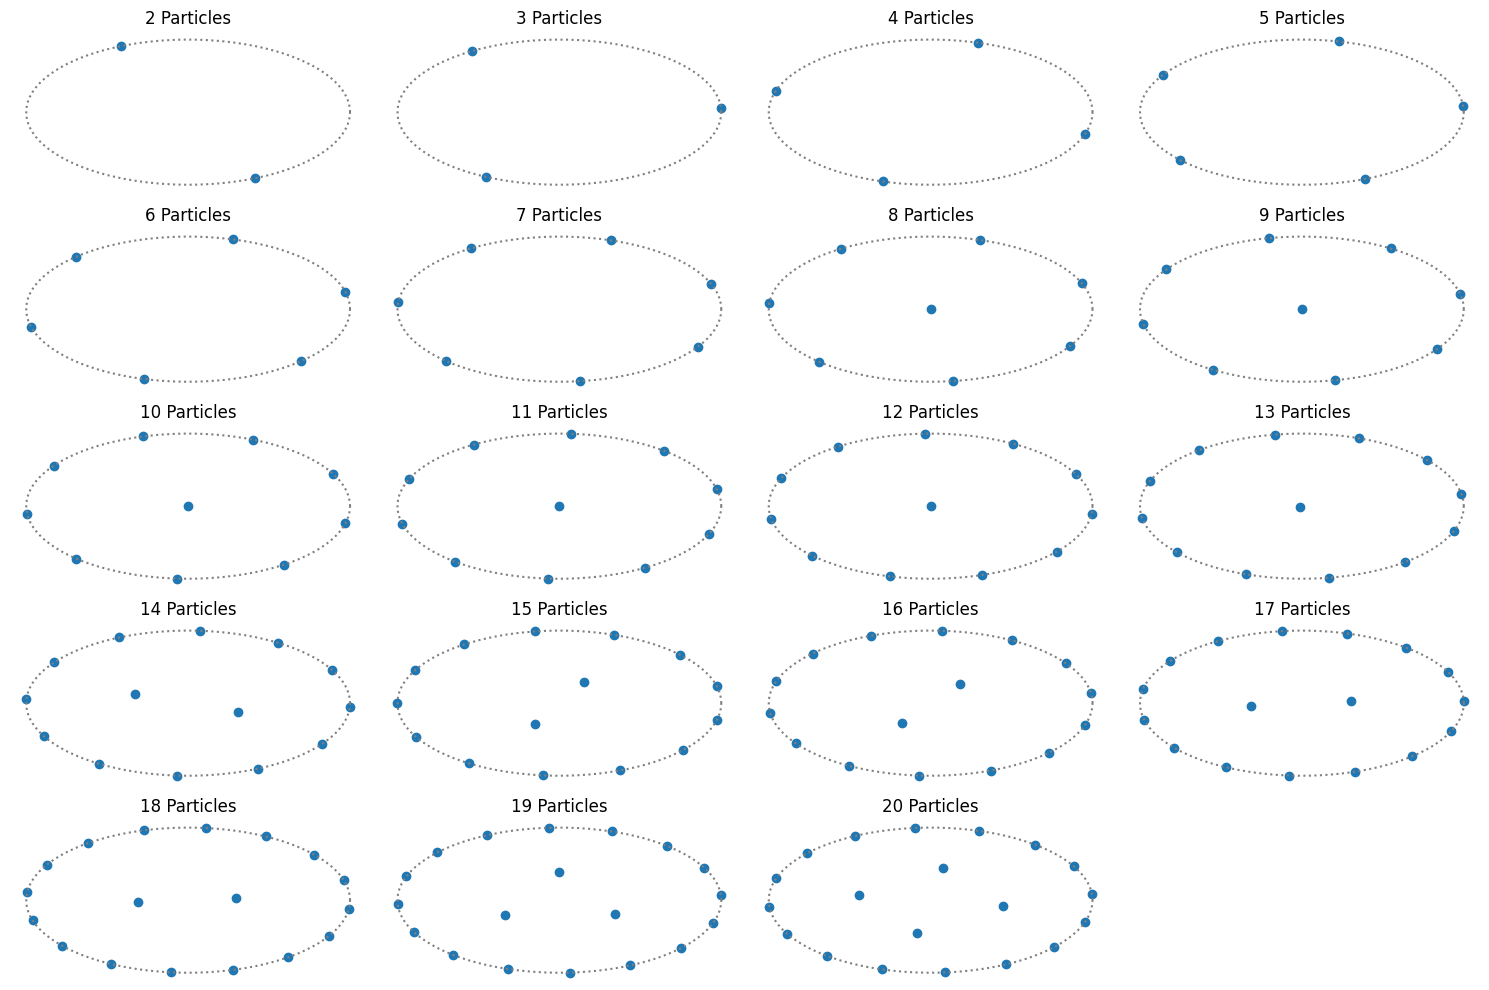

In [16]:
def run_experiment(max_particles, steps, num_runs=10):
    """
    Run the simulation for a range of particle numbers and record averaged results.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results: A list of dictionaries containing particle count, averaged internal particle count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    results = []
    examples = []

    for num_particles in range(2, max_particles + 1):
        internal_counts = []
        energies = []
        example_locations = None

        for run in range(num_runs):
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=paper_cooling_schedule,
                step_size_schedule=random_step_size_schedule,
                steps=steps
            )
            sim.run_simulation(steps)

            internal_counts.append(np.sum(np.linalg.norm(sim.particle_locations, axis=1) < 0.99))
            energies.append(sim.E)

            if run == 0:  # Save the first run as an example
                example_locations = sim.particle_locations

        avg_internal_count = np.mean(internal_counts)
        avg_energy = np.mean(energies)

        results.append({
            "Particles": num_particles,
            "Internal Count (Avg)": avg_internal_count,
            "Total Energy (Avg)": avg_energy
        })

        examples.append((num_particles, example_locations))
        print(f"Completed simulation for {num_particles} particles (averaged over {num_runs} runs).")

    return results, examples

def plot_results_and_examples(results, examples):
    """
    Plot the results table and one example configuration for each particle count in a combined figure.

    Parameters:
    - results: List of dictionaries containing particle count, averaged internal particle count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    import pandas as pd
    from IPython.display import display

    # Convert results to a DataFrame and display it
    results_df = pd.DataFrame(results)
    display(results_df)

    # Plot particle configurations
    num_examples = len(examples)
    fig, axes = plt.subplots(nrows=(num_examples // 4) + 1, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (num_particles, locations) in enumerate(examples):
        ax = axes[idx]
        thetas = np.linspace(0, 2 * np.pi, 100)
        ax.plot(np.cos(thetas), np.sin(thetas), linestyle=':', color='gray')
        ax.scatter(locations[:, 0], locations[:, 1])
        ax.set_title(f"{num_particles} Particles")
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.axis('off')

    # Turn off unused subplots
    for ax in axes[len(examples):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_particles = 5
    max_particles = 20
    steps = 10000
    num_runs = 10

    # Run the experiment and collect resultsd
    results, examples = run_experiment(max_particles, steps, num_runs)

    # Plot results table and example configurations
    plot_results_and_examples(results, examples)

All strategy combinaions and their average energy:

In [ ]:
import pandas as pd


def test_all_strategies(max_particles, steps, num_runs):
    """
    Test all combinations of cooling and step size schedules to find the best strategies.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results_summary: DataFrame summarizing average energies for each strategy.
    """
    # Define available strategies
    cooling_schedules = {
        "Basic": basic_cooling_schedule,
        "Paper": paper_cooling_schedule,
        "Exponential": exponential_cooling_schedule,
        "Logarithmic": log_cooling_schedule
    }
    step_size_schedules = {
        "Constant": const_step_size_schedule,
        "Random": random_step_size_schedule,
        "Hyperbolic": hyperbolic_step_size_schedule,
        "Linear": linear_step_size_schedule
    }

    results_summary = []

    # Test all combinations of strategies
    for cooling_name, cooling_schedule in cooling_schedules.items():
        for step_name, step_size_schedule in step_size_schedules.items():
            print(f"Testing: Cooling={cooling_name}, Step Size={step_name}")
            avg_energies = []

            for num_particles in range(2, max_particles + 1):
                energies = []
                for _ in range(num_runs):
                    sim = CircleParticleSim(
                        N=num_particles,
                        cooling_schedule=cooling_schedule,
                        step_size_schedule=step_size_schedule,
                        steps=steps
                    )
                    sim.run_simulation(steps)
                    energies.append(sim.E)

                avg_energies.append(np.mean(energies))
            
            results_summary.append({
                "Cooling": cooling_name,
                "Step Size": step_name,
                "Avg Energy": np.mean(avg_energies)
            })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results_summary)
    return results_df


def display_best_strategies(results_df):
    """
    Display the best strategies based on average energy.

    Parameters:
    - results_df: DataFrame summarizing average energies for each strategy.
    """
    best_strategies = results_df.sort_values("Avg Energy").reset_index(drop=True)
    print("Top Strategies:")
    display(best_strategies)

    # Plot results
    plt.figure(figsize=(12, 6))
    for cooling in results_df["Cooling"].unique():
        subset = results_df[results_df["Cooling"] == cooling]
        plt.plot(
            subset["Step Size"],
            subset["Avg Energy"],
            label=cooling,
            marker="o"
        )
    plt.title("Average Energy by Strategy")
    plt.xlabel("Step Size Strategy")
    plt.ylabel("Average Energy")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    # Experiment parameters
    max_particles = 12
    steps = 10000
    num_runs = 5

    # Test all strategies
    results_df = test_all_strategies(max_particles, steps, num_runs)

    # Display best strategies
    display_best_strategies(results_df)


NameError: name 'basic_cooling_schedule' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CircleParticleSim import CircleParticleSim, paper_cooling_schedule, random_step_size_schedule

def run_experiment_and_save_all(max_particles, steps, num_runs, output_file):
    """
    Run the simulation for a range of particle numbers, save raw data, and return aggregated results.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.
    - output_file: Filepath to save the collected data.

    Returns:
    - results_summary: List of dictionaries with particle count, average floating count, and average energy.
    """
    all_data = []  # To store data for all runs and particle counts

    for num_particles in range(9, max_particles + 1):
        print(f"Running simulations for {num_particles} particles")

        for run_count in range(num_runs):
            # Initialize simulation
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=paper_cooling_schedule,
                step_size_schedule=random_step_size_schedule,
                steps=steps
            )
            
            sim.run_simulation(steps)

            # Calculate floating particles (not on edge)
            radii = np.linalg.norm(sim.particle_locations, axis=1)
            floating_count = np.sum(radii < 0.99)

            # Append data for this run
            all_data.append({
                "Particles": num_particles,
                "Run": run_count,
                "Floating Count": floating_count,
                "Energy": sim.E
            })

    # Save all data to a single .npy file
    np.save(output_file, all_data)
    print(f"All data saved to {output_file}")

    return all_data

def create_summary_table_and_save(all_data, summary_file):
    """
    Create a summary table from all data, save it as a CSV file, and display it.

    Parameters:
    - all_data: Raw data collected from simulations.
    - summary_file: Filepath to save the summary table.

    Returns:
    - summary_df: Pandas DataFrame containing the summary table.
    """
    # Convert raw data into a DataFrame
    df = pd.DataFrame(all_data)

    # Aggregate results by particle count
    summary_df = df.groupby("Particles").agg({
        "Floating Count": "mean",
        "Energy": "mean"
    }).reset_index()

    # Rename columns for clarity
    summary_df.rename(columns={"Floating Count": "Avg Floating", "Energy": "Avg Energy"}, inplace=True)

    # Save the summary table to a CSV file
    summary_df.to_csv(summary_file, index=False)
    print(f"Summary table saved to {summary_file}")

    # Display the summary table
    print(summary_df)

    return summary_df

if __name__ == "__main__":
    # Parameters
    max_particles = 25  # Maximum number of particles to test (including 50 as an additional case)
    steps = 10000       # Number of steps per simulation
    num_runs = 10       # Number of runs per particle count

    # Filepaths
    data_file = "data/all_simulation_data.npy"
    summary_file = "data/summary_table.csv"

    # Run the experiment and save all data
    all_data = run_experiment_and_save_all(max_particles, steps, num_runs, data_file)

    # Create and save the summary table
    summary_df = create_summary_table_and_save(all_data, summary_file)


Running simulations for 9 particles


/Users/maartenstork/Documents/GitHub/Stoc3/Stochastic_Simulation_Assignment_3/CircleParticleSim.py:191: RuntimeWarning: invalid value encountered in divide
  F = diff / (np.linalg.norm(diff, axis=1) **3).reshape(-1,1)


AttributeError: module 'numpy' has no attribute 'atan2'

All strategy combinaions and their average accuracy:

In [3]:
optimal_distributions = {
    2: (2, 0), 3: (3, 0), 4: (4, 0), 5: (5, 0),
    6: (6, 0), 7: (7, 0), 8: (8, 0), 9: (9, 0),
    10: (10, 0), 11: (11, 0), 12: (11, 1),
    13: (11, 2), 14: (11, 3), 15: (11, 4), 16: (11, 5)
}

def evaluate_results(sim, num_particles):
    """
    Evaluate a simulation result based on the number of particles on the boundary.

    Parameters:
    - sim: The CircleParticleSim object after simulation.
    - num_particles: The number of particles in the system.

    Returns:
    - boundary_count: Number of particles on the boundary.
    - inside_count: Number of particles inside.
    """
    radii = np.linalg.norm(sim.particle_locations, axis=1)
    boundary_count = np.sum(radii >= 0.99)  # Threshold for boundary
    inside_count = num_particles - boundary_count
    return boundary_count, inside_count


def test_all_strategies_with_boundary_check(max_particles, steps, num_runs):
    """
    Test all strategies and evaluate based on particles on the boundary vs. inside.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results_summary: DataFrame summarizing the accuracy of each strategy.
    """
    results_summary = []

    cooling_schedules = {
        "Basic": basic_cooling_schedule,
        "Paper": paper_cooling_schedule,
        "Exponential": exponential_cooling_schedule,
        "Logarithmic": log_cooling_schedule
    }
    step_size_schedules = {
        "Constant": const_step_size_schedule,
        "Random": random_step_size_schedule,
        "Hyperbolic": hyperbolic_step_size_schedule,
        "Linear": linear_step_size_schedule
    }

    for cooling_name, cooling_schedule in cooling_schedules.items():
        for step_name, step_size_schedule in step_size_schedules.items():
            print(f"Testing: Cooling={cooling_name}, Step Size={step_name}")

            for num_particles in range(2, max_particles + 1):
                total_matches = 0

                for _ in range(num_runs):
                    sim = CircleParticleSim(
                        N=num_particles,
                        cooling_schedule=cooling_schedule,
                        step_size_schedule=step_size_schedule,
                        steps=steps
                    )
                    sim.run_simulation(steps)

                    boundary_count, inside_count = evaluate_results(sim, num_particles)
                    optimal_boundary, optimal_inside = optimal_distributions.get(
                        num_particles, (None, None)
                    )

                    if boundary_count == optimal_boundary and inside_count == optimal_inside:
                        total_matches += 1

                accuracy = total_matches / num_runs
                results_summary.append({
                    "Cooling": cooling_name,
                    "Step Size": step_name,
                    "Particles": num_particles,
                    "Accuracy": accuracy
                })

    return pd.DataFrame(results_summary)

if __name__ == "__main__":
    # Define experiment parameters
    max_particles = 16  # Maximum number of particles to test
    steps = 10000       # Number of steps per simulation
    num_runs = 5        # Number of runs to average results

    # Run the strategy testing with boundary check
    results_df = test_all_strategies_with_boundary_check(max_particles, steps, num_runs)

    # Display the results
    print("Testing Results:")
    print(results_df)

NameError: name 'basic_cooling_schedule' is not defined

Top Strategies (Overall Accuracy):


,Cooling,Step Size,Accuracy
0,Basic,Linear,0.640000
1,Basic,Constant,0.613333
2,Paper,Constant,0.613333
3,Exponential,Linear,0.600000
4,Paper,Linear,0.600000
5,Paper,Random,0.600000
6,Basic,Random,0.586667
7,Exponential,Random,0.560000
8,Exponential,Hyperbolic,0.533333
9,Exponential,Constant,0.506667


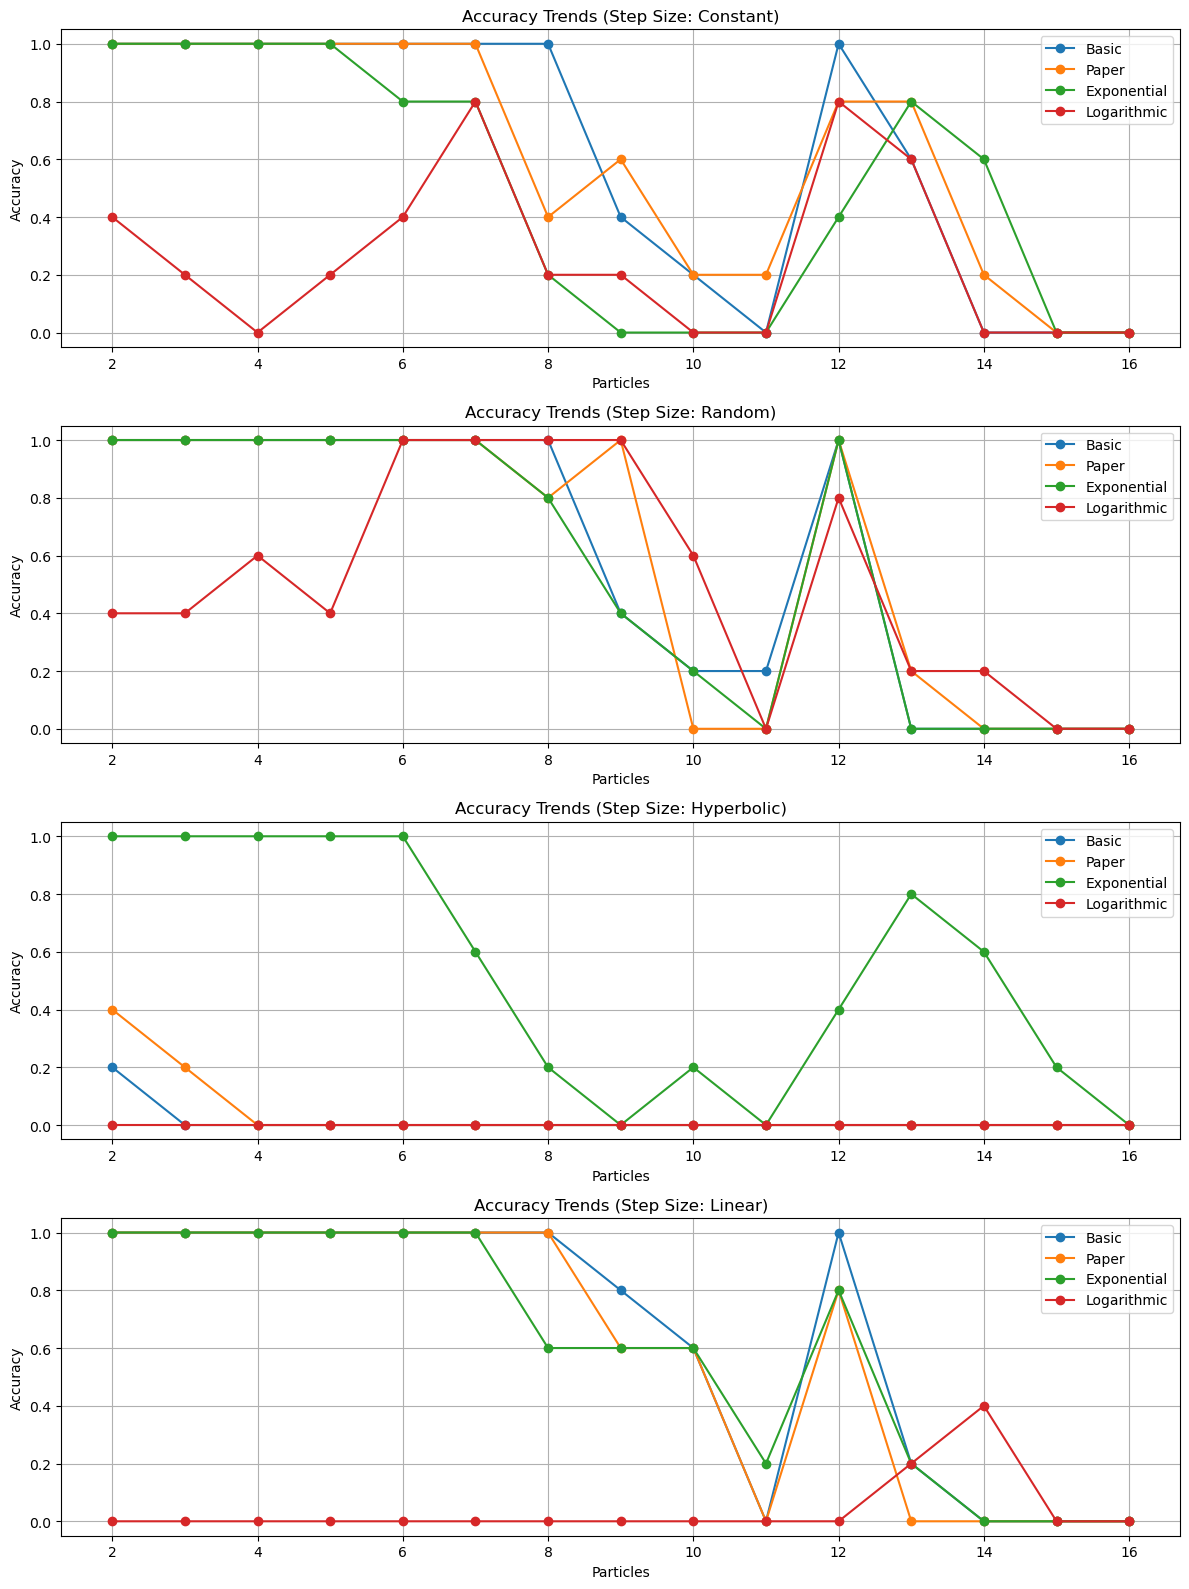

In [16]:
def display_best_strategies(results_df):
    """
    Display and plot the best strategies based on overall accuracy.

    Parameters:
    - results_df: DataFrame summarizing the accuracy of each strategy.
    """
    # Group by strategy (Cooling + Step Size) and calculate the mean accuracy across all particle counts
    grouped = results_df.groupby(["Cooling", "Step Size"])["Accuracy"].mean().reset_index()

    # Sort strategies by overall accuracy
    best_strategies = grouped.sort_values("Accuracy", ascending=False).reset_index(drop=True)

    print("Top Strategies (Overall Accuracy):")
    display(best_strategies)

def plot_accuracy_by_strategy(results_df):
    """
    Plot accuracy trends for each step size strategy across cooling schedules.

    Parameters:
    - results_df: DataFrame summarizing the accuracy of each strategy.
    """
    step_size_strategies = results_df["Step Size"].unique()
    cooling_schedules = results_df["Cooling"].unique()

    # Create subplots for each step size strategy
    fig, axes = plt.subplots(nrows=len(step_size_strategies), ncols=1, figsize=(12, len(step_size_strategies) * 4))
    if len(step_size_strategies) == 1:  # If only one strategy, axes is not iterable
        axes = [axes]

    for ax, step_size in zip(axes, step_size_strategies):
        for cooling in cooling_schedules:
            subset = results_df[(results_df["Step Size"] == step_size) & (results_df["Cooling"] == cooling)]
            ax.plot(
                subset["Particles"],
                subset["Accuracy"],
                label=cooling,
                marker="o"
            )
        ax.set_title(f"Accuracy Trends (Step Size: {step_size})")
        ax.set_xlabel("Particles")
        ax.set_ylabel("Accuracy")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

display_best_strategies(results_df)
plot_accuracy_by_strategy(results_df)


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_experiment_and_save_all(max_particles, steps, num_runs, output_file):
    """
    Run simulations, save raw data, and return aggregated results.
    """
    all_data = []

    for num_particles in range(9, max_particles + 1):
        print(f"Running simulations for {num_particles} particles")
        
        for run_count in range(num_runs):
            # Initialize simulation with the same schedule as the first code
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=paper_cooling_schedule,  # Explicitly specify cooling schedule
                step_size_schedule=random_step_size_schedule,  # Explicitly specify step size schedule
                steps=steps
            )
            
            sim.run_simulation(steps)
            
            # Calculate floating particles (radii < 0.99)
            radii = np.linalg.norm(sim.particle_locations, axis=1)
            floating_count = np.sum(radii < 0.99)
            
            all_data.append({
                "Particles": num_particles,
                "Run": run_count,
                "Floating Count": floating_count,
                "Energy": sim.E
            })

    # Save data in a single .npy file
    np.save(output_file, all_data)
    print(f"Data saved to {output_file}")
    
    return all_data

def create_summary_table_and_save(all_data, summary_file):
    """
    Create a summary table with particles, avg floating, and avg energy.
    """
    df = pd.DataFrame(all_data)
    
    # Group by particle count and calculate averages
    summary_df = df.groupby("Particles").agg({
        "Floating Count": "mean",
        "Energy": "mean"
    }).reset_index()
    
    summary_df.rename(columns={"Floating Count": "Avg Floating", "Energy": "Avg Energy"}, inplace=True)
    
    # Save the summary table to CSV
    summary_df.to_csv(summary_file, index=False)
    print(f"Summary saved to {summary_file}")
    
    print(summary_df)
    return summary_df

def plot_floating_boxplots(all_data, boxplot_file):
    """
    Create boxplots of floating points by particle count.
    """
    df = pd.DataFrame(all_data)

    plt.figure(figsize=(12, 6))
    plt.boxplot([df[df["Particles"] == p]["Floating Count"] for p in sorted(df["Particles"].unique())],
                labels=sorted(df["Particles"].unique()))
    plt.xlabel("Number of Particles")
    plt.ylabel("Floating Points")
    plt.title("Distribution of Floating Points for Each Particle Count")
    plt.grid(True)
    plt.savefig(boxplot_file)
    plt.show()
    print(f"Boxplot saved to {boxplot_file}")

if __name__ == "__main__":
    # Parameters
    max_particles = 25  # Max particle count
    steps = 10000       # Simulation steps
    num_runs = 10       # Number of runs

    # Filepaths
    data_file = "data/all_simulation_data.npy"
    summary_file = "data/summary_table.csv"
    boxplot_file = "data/floating_boxplot.png"

    # Run experiment and save all data
    all_data = run_experiment_and_save_all(max_particles, steps, num_runs, data_file)

    # Create summary table
    summary_df = create_summary_table_and_save(all_data, summary_file)

    # Generate boxplot for floating particles
    plot_floating_boxplots(all_data, boxplot_file)


Running simulations for 9 particles


KeyboardInterrupt: 

Running simulations for 9 particles
Running simulations for 10 particles
Running simulations for 11 particles
Running simulations for 12 particles
Running simulations for 13 particles
Running simulations for 14 particles
Running simulations for 15 particles
Running simulations for 16 particles
Running simulations for 17 particles
Running simulations for 18 particles
Running simulations for 19 particles
Running simulations for 20 particles
Running simulations for 21 particles
Running simulations for 22 particles
Running simulations for 23 particles
Running simulations for 24 particles
Running simulations for 25 particles
Running simulations for 26 particles
Running simulations for 27 particles
Running simulations for 28 particles
Running simulations for 29 particles
Running simulations for 30 particles
Running simulations for 31 particles
Running simulations for 32 particles
Running simulations for 33 particles
Running simulations for 34 particles
Running simulations for 35 particles
Ru

/var/folders/nd/y2qj72995qj3fvjff5850_z00000gn/T/ipykernel_9846/2230638127.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


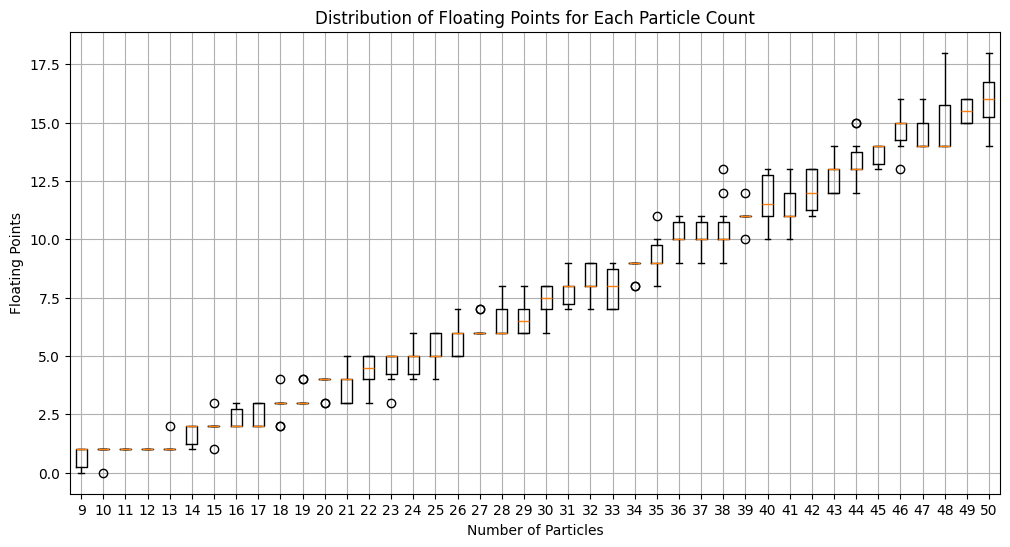

Boxplot saved to data/floating_boxplot.png


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CircleParticleSim import *  # Ensure CircleParticleSim is correctly implemented

def run_experiment_and_save_all(max_particles, steps, num_runs, output_file):
    """
    Run simulations, save raw data, and return aggregated results.
    """
    all_data = []

    for num_particles in range(9, max_particles + 1):
        print(f"Running simulations for {num_particles} particles")
        
        for run_count in range(num_runs):
            # Initialize simulation with the same schedule as the first code
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=paper_cooling_schedule,  # Explicitly specify cooling schedule
                step_size_schedule=random_step_size_schedule,  # Explicitly specify step size schedule
                steps=steps
            )
            
            sim.run_simulation(steps)
            
            # Calculate floating particles (radii < 0.99)
            radii = np.linalg.norm(sim.particle_locations, axis=1)
            floating_count = np.sum(radii < 0.99)
            
            all_data.append({
                "Particles": num_particles,
                "Run": run_count,
                "Floating Count": floating_count,
                "Energy": sim.E
            })

    # Save data in a single .npy file
    np.save(output_file, all_data)
    print(f"Data saved to {output_file}")
    
    return all_data

def plot_floating_boxplots(all_data, boxplot_file):
    """
    Create boxplots of floating points by particle count.
    """
    df = pd.DataFrame(all_data)

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        [df[df["Particles"] == p]["Floating Count"].values for p in sorted(df["Particles"].unique())],
        labels=sorted(df["Particles"].unique())
    )
    plt.xlabel("Number of Particles")
    plt.ylabel("Floating Points")
    plt.title("Distribution of Floating Points for Each Particle Count")
    plt.grid(True)
    plt.savefig(boxplot_file)
    plt.show()
    print(f"Boxplot saved to {boxplot_file}")

if __name__ == "__main__":
    # Parameters
    max_particles = 50  # Max particle count
    steps = 10000       # Simulation steps
    num_runs = 10       # Number of runs

    # Filepaths
    data_file = "data/all_simulation_data.npy"
    boxplot_file = "data/floating_boxplot.png"

    # Run experiment and save all data
    all_data = run_experiment_and_save_all(max_particles, steps, num_runs, data_file)

    # Generate boxplot for floating particles
    plot_floating_boxplots(all_data, boxplot_file)


Completed simulation for 2 particles (averaged over 10 runs).
Completed simulation for 3 particles (averaged over 10 runs).
Completed simulation for 4 particles (averaged over 10 runs).
Completed simulation for 5 particles (averaged over 10 runs).
Completed simulation for 6 particles (averaged over 10 runs).
Completed simulation for 7 particles (averaged over 10 runs).
Completed simulation for 8 particles (averaged over 10 runs).
Completed simulation for 9 particles (averaged over 10 runs).
Completed simulation for 10 particles (averaged over 10 runs).
Completed simulation for 11 particles (averaged over 10 runs).
Completed simulation for 12 particles (averaged over 10 runs).
Completed simulation for 13 particles (averaged over 10 runs).
Completed simulation for 14 particles (averaged over 10 runs).
Completed simulation for 15 particles (averaged over 10 runs).
Completed simulation for 16 particles (averaged over 10 runs).
Completed simulation for 17 particles (averaged over 10 runs).


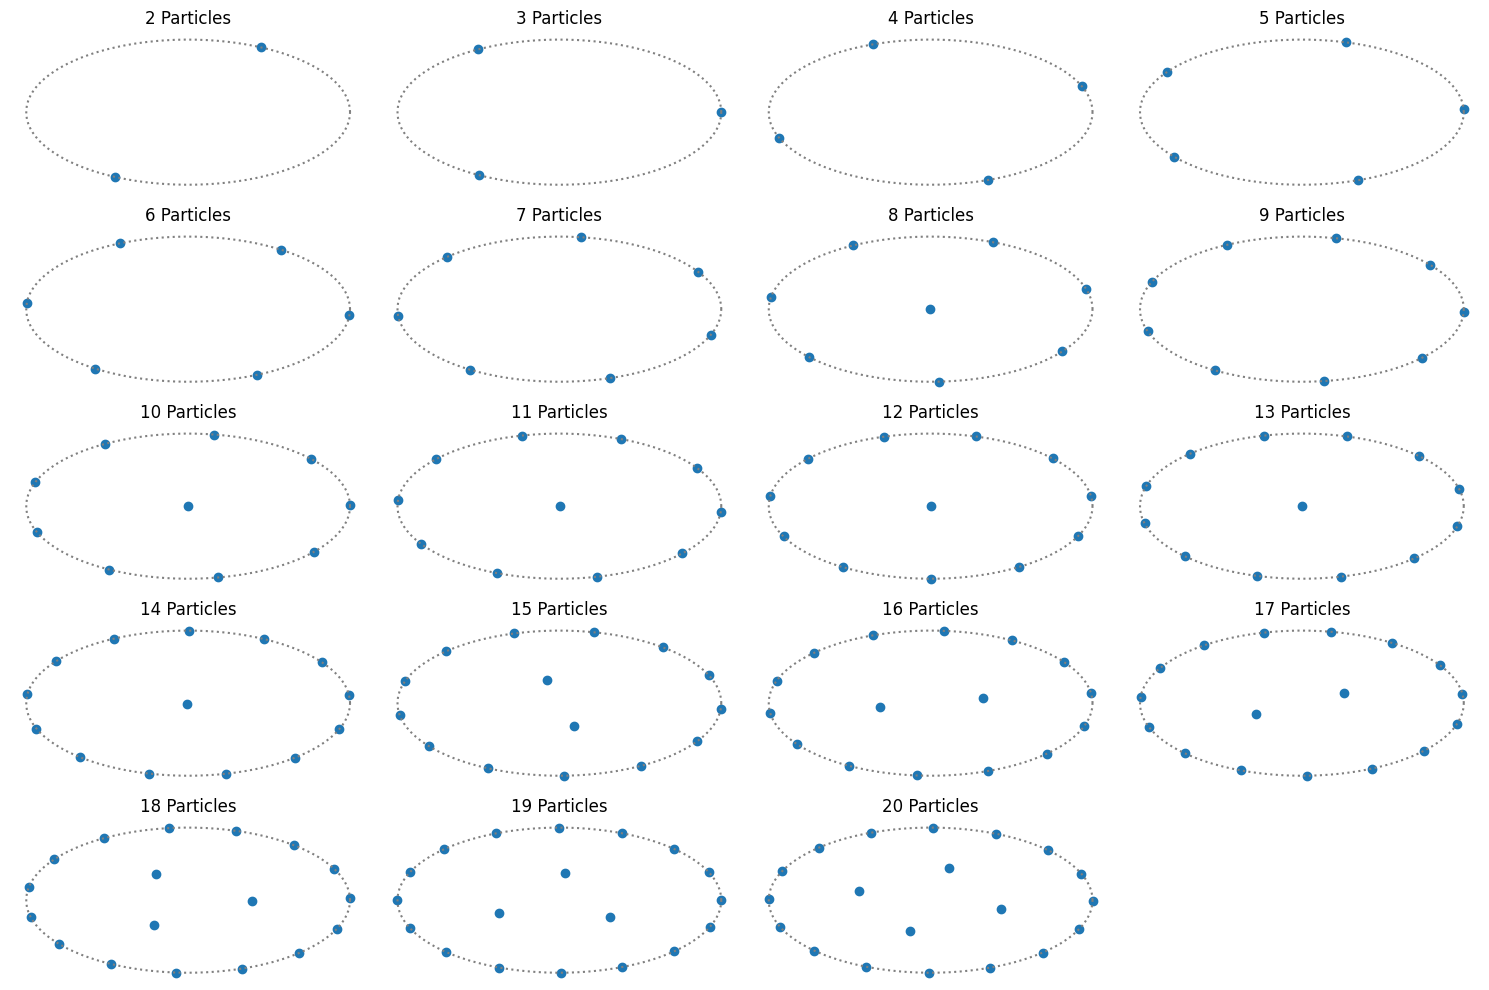

/var/folders/nd/y2qj72995qj3fvjff5850_z00000gn/T/ipykernel_9846/3274527218.py:120: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


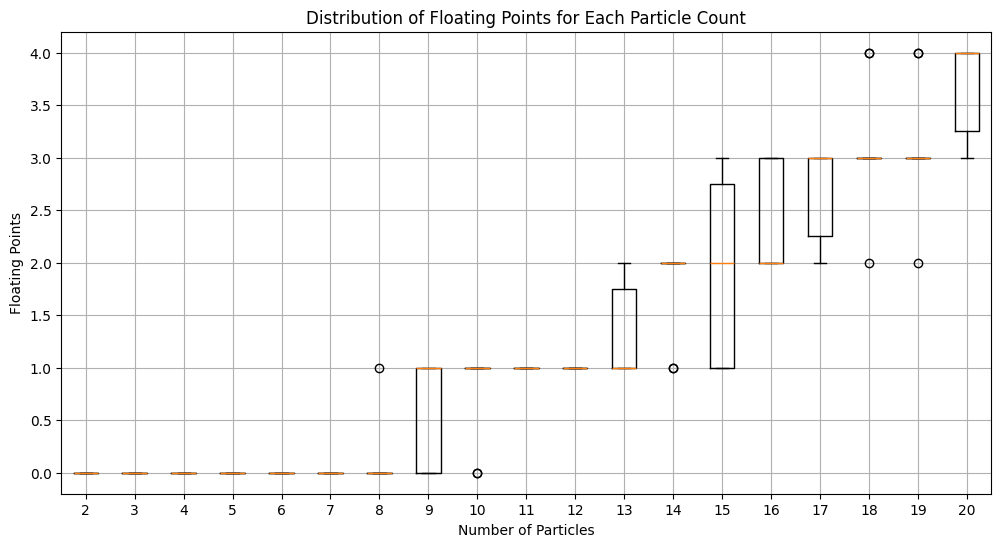

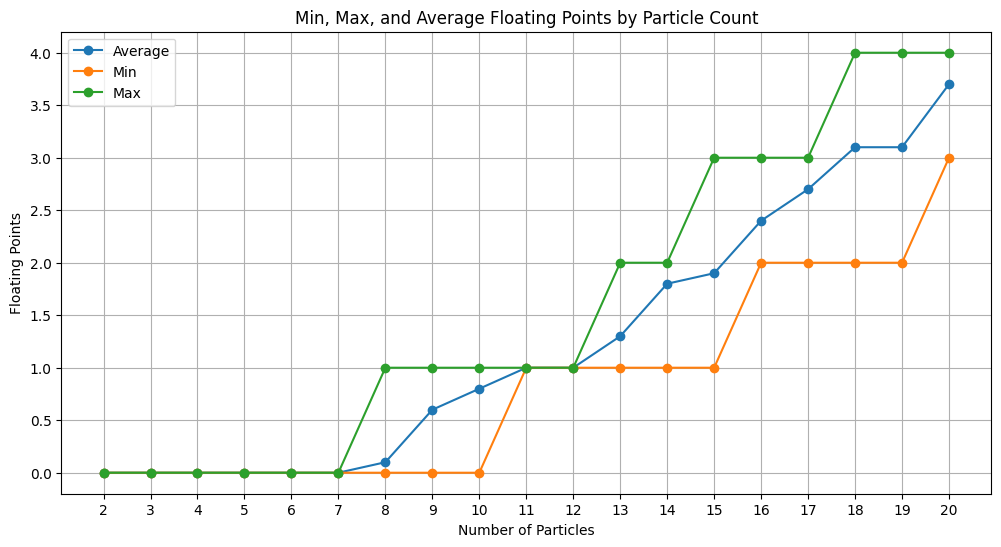

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CircleParticleSim import *  # Ensure the CircleParticleSim module is imported correctly

def run_experiment(max_particles, steps, num_runs=10):
    """
    Run the simulation for a range of particle numbers and record results.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results: A list of dictionaries containing particle count, average internal count, min/max internal count, and energy.
    - examples: List of tuples containing particle count and their locations.
    - raw_data: Raw data collected for boxplot visualization.
    """
    results = []
    examples = []
    raw_data = []  # Store raw data for boxplots

    for num_particles in range(2, max_particles + 1):
        internal_counts = []
        energies = []
        example_locations = None

        for run in range(num_runs):
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=basic_cooling_schedule,
                step_size_schedule=random_step_size_schedule,
                steps=steps
            )
            sim.run_simulation(steps)

            # Calculate floating particles (not on the edge)
            floating_count = np.sum(np.linalg.norm(sim.particle_locations, axis=1) < 0.99)
            internal_counts.append(floating_count)
            energies.append(sim.E)

            # Save example locations from the first run
            if run == 0:
                example_locations = sim.particle_locations

            # Store raw data for boxplot
            raw_data.append({
                "Particles": num_particles,
                "Run": run,
                "Floating Count": floating_count,
                "Energy": sim.E
            })

        avg_internal_count = np.mean(internal_counts)
        min_internal_count = np.min(internal_counts)
        max_internal_count = np.max(internal_counts)
        avg_energy = np.mean(energies)

        results.append({
            "Particles": num_particles,
            "Internal Count (Avg)": avg_internal_count,
            "Internal Count (Min)": min_internal_count,
            "Internal Count (Max)": max_internal_count,
            "Total Energy (Avg)": avg_energy
        })

        examples.append((num_particles, example_locations))
        print(f"Completed simulation for {num_particles} particles (averaged over {num_runs} runs).")

    return results, examples, raw_data


def plot_results_and_examples(results, examples):
    """
    Plot the results table and one example configuration for each particle count in a combined figure.

    Parameters:
    - results: List of dictionaries containing particle count, average internal count, min/max internal count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    results_df = pd.DataFrame(results)
    print("Summary Table:")
    print(results_df)

    # Plot particle configurations
    num_examples = len(examples)
    fig, axes = plt.subplots(nrows=(num_examples // 4) + 1, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (num_particles, locations) in enumerate(examples):
        ax = axes[idx]
        thetas = np.linspace(0, 2 * np.pi, 100)
        ax.plot(np.cos(thetas), np.sin(thetas), linestyle=':', color='gray')
        ax.scatter(locations[:, 0], locations[:, 1])
        ax.set_title(f"{num_particles} Particles")
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.axis('off')

    # Turn off unused subplots
    for ax in axes[len(examples):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


def plot_boxplots(raw_data):
    """
    Create boxplots of floating counts by particle count.

    Parameters:
    - raw_data: List of dictionaries with raw data from the simulation.
    """
    df = pd.DataFrame(raw_data)
    particle_counts = sorted(df["Particles"].unique())  # Ensure X-axis has all particle counts

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        [df[df["Particles"] == p]["Floating Count"].values for p in particle_counts],
        labels=particle_counts
    )
    plt.xlabel("Number of Particles")
    plt.ylabel("Floating Points")
    plt.title("Distribution of Floating Points for Each Particle Count")
    plt.xticks(range(1, len(particle_counts) + 1), particle_counts)  # Show all particle counts on X-axis
    plt.grid(True)
    plt.show()


def plot_min_max_avg(results):
    """
    Plot min, max, and average floating counts for each particle count.

    Parameters:
    - results: List of dictionaries containing results summary.
    """
    results_df = pd.DataFrame(results)

    plt.figure(figsize=(12, 6))
    plt.plot(results_df["Particles"], results_df["Internal Count (Avg)"], label="Average", marker="o")
    plt.plot(results_df["Particles"], results_df["Internal Count (Min)"], label="Min", marker="o")
    plt.plot(results_df["Particles"], results_df["Internal Count (Max)"], label="Max", marker="o")
    plt.xlabel("Number of Particles")
    plt.ylabel("Floating Points")
    plt.title("Min, Max, and Average Floating Points by Particle Count")
    plt.xticks(results_df["Particles"])  # Show all particle counts on X-axis
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == '__main__':
    num_particles = 5
    max_particles = 20
    steps = 10000
    num_runs = 10

    # Run the experiment and collect results
    results, examples, raw_data = run_experiment(max_particles, steps, num_runs)

    # Plot results table and example configurations
    plot_results_and_examples(results, examples)

    # Plot boxplots for floating points
    plot_boxplots(raw_data)

    # Plot min, max, and average values
    plot_min_max_avg(results)
